<a href="https://colab.research.google.com/github/iglitchfast/Graph/blob/main/graph_third_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

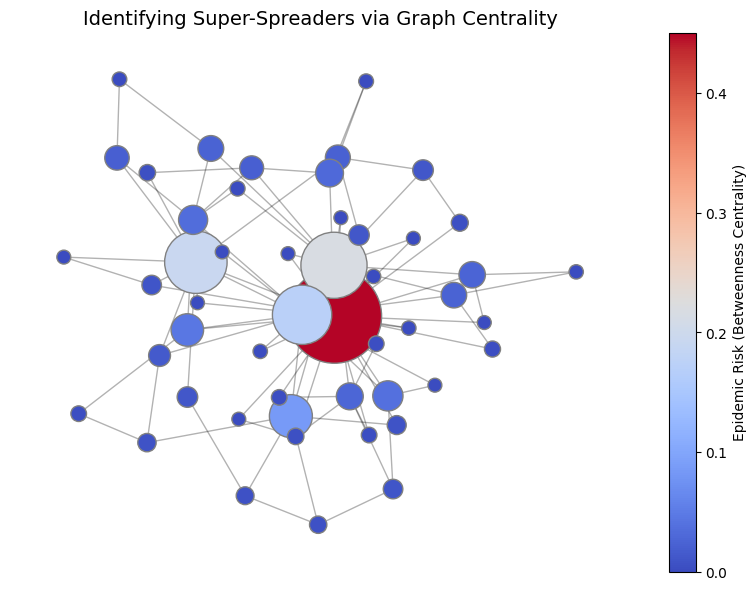

Top 3 Highest Risk Nodes (Super-Spreaders):
Node ID: 0, Risk Score: 0.4505
Node ID: 1, Risk Score: 0.2170
Node ID: 5, Risk Score: 0.1923


In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# 1. Generate a scale-free network (realistic for social networks)
# 50 nodes, each new node attaches to 2 existing nodes
G = nx.barabasi_albert_graph(50, 2, seed=42)

# Calculate layout once to ensure nodes and edges align perfectly
pos = nx.spring_layout(G, seed=42)

# 2. Calculate Betweenness Centrality
centrality = nx.betweenness_centrality(G)

# 3. Prepare visualization based on centrality scores
# Node size depends on centrality (scaled up for visibility)
# Add a small base size (e.g., +100) so nodes with 0 centrality don't disappear entirely
node_sizes = [(v * 10000) + 100 for v in centrality.values()]

# Node color gradient based on centrality
node_colors = list(centrality.values())

# Create plot structure
plt.figure(figsize=(10, 7))
# Get Current Axes - crucial for the fix later
ax = plt.gca()

# Draw Nodes
nodes = nx.draw_networkx_nodes(G, pos=pos,
                               node_size=node_sizes,
                               node_color=node_colors,
                               cmap=plt.cm.coolwarm, # Red-Blue color map
                               edgecolors='gray',
                               ax=ax)

# Draw Edges
nx.draw_networkx_edges(G, pos=pos, alpha=0.3, ax=ax)

# Create the ScalarMappable for the legend
vmin = min(node_colors)
vmax = max(node_colors)
# Ensure vmin and vmax are not identical to avoid division by zero in normalization if graph is tiny
if vmin == vmax:
      vmax += 0.0001

sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])

# Add a colorbar, explicitly telling it which axis (ax) to attach to
cbar = plt.colorbar(sm, ax=ax, label="Epidemic Risk (Betweenness Centrality)")
plt.title("Identifying Super-Spreaders via Graph Centrality", fontsize=14)
plt.axis('off')
plt.show()

# Print top 3 risky individuals
sorted_risk = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 3 Highest Risk Nodes (Super-Spreaders):")
for node, score in sorted_risk[:3]:
    print(f"Node ID: {node}, Risk Score: {score:.4f}")